## 피마 인디언 당뇨병 예측

- 피마 인디언 당뇨병 측정 데이터를 이용해 당뇨병 여부를 예측

- [캐글](https://www.kaggle.com)의 [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)에서 `diabetes.csv`를 다운로드
- 파일을 datasets 디렉토리에 저장

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

In [2]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


* Pregnancies: 임신 횟수
* Glucose: 포도당 부하 검사 수치
* BloodPressure: 혈압(mm Hg)
* SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
* Insulin: 혈청 인슐린(mu U/ml)
* BMI: 체질량지수(체중(kg)/(키(m))^2)
* DiabetesPedigreeFunction: 당뇨 내력 가중치 값
* Age: 나이
* Outcome: 클래스 결정 값(0또는 1)

In [3]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
diabetes.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- histogram으로 특성별 분포 확인

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

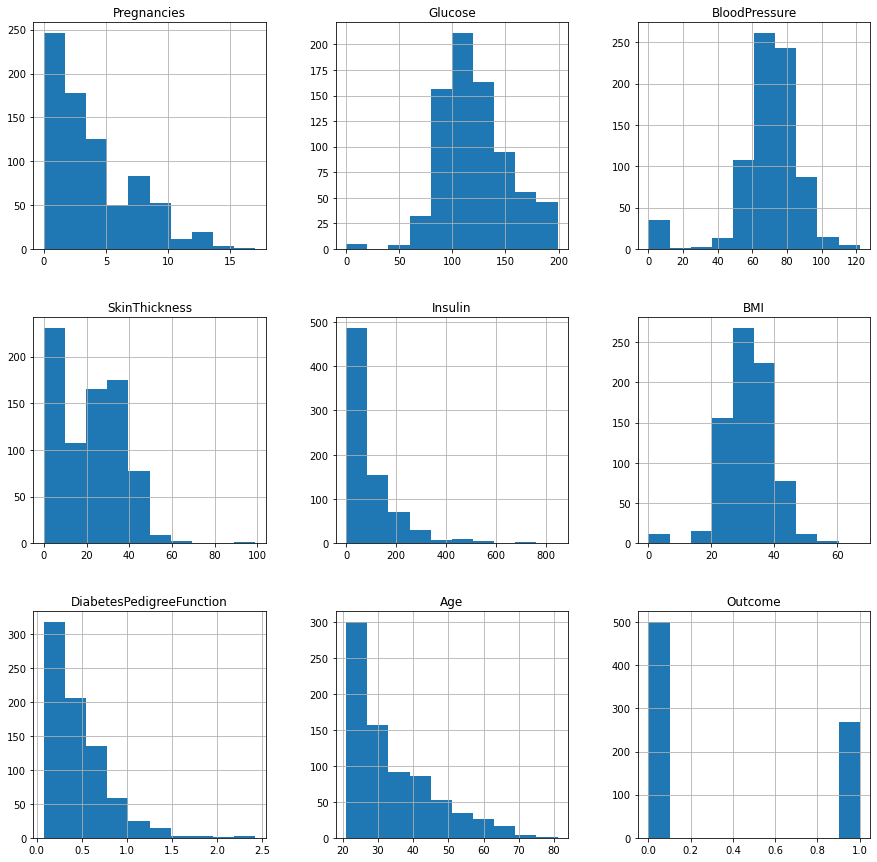

In [5]:
diabetes.hist(figsize = (15,15))

- Glucose, BloodPressure, SkinThickness, Insulin, BMI에 0값이 분포 - 0이 나올 수 없는 값이므로 결측치로 보임

- 0 값을 nan 값으로 변경

In [6]:
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

In [7]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
diabetes[zero_features] = diabetes[zero_features].replace(0, np.nan)

In [9]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
diabetes['Glucose'].fillna(diabetes['Glucose'].mean(), inplace = True)
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(), inplace = True)
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(), inplace = True)
diabetes['Insulin'].fillna(diabetes['Insulin'].median(), inplace = True)
diabetes['BMI'].fillna(diabetes['BMI'].median(), inplace = True)

In [11]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

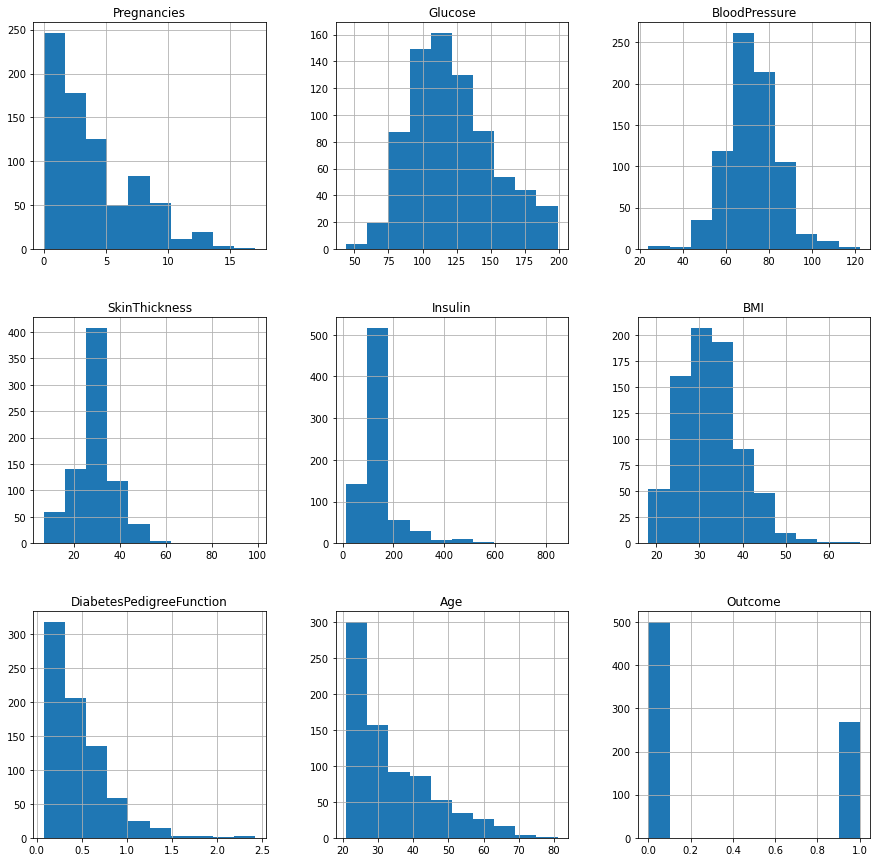

In [12]:
diabetes.hist(figsize = (15,15))

- (참고) displot을 이용하여 histogram과 밀도 그래프 함께 표현

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

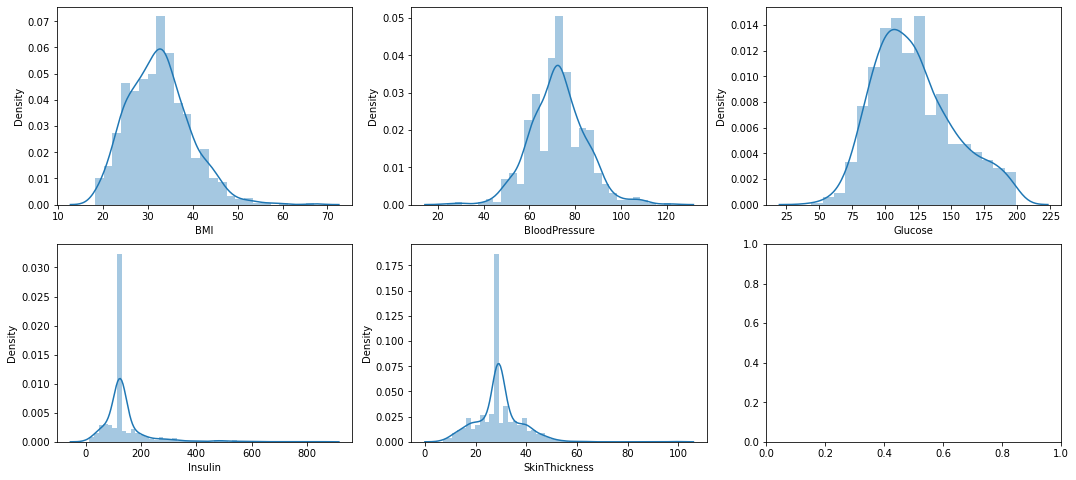

In [13]:
import seaborn as sns

figure, ((ax1,ax2,ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.distplot(diabetes['BMI'], ax=ax1)
sns.distplot(diabetes['BloodPressure'], ax=ax2)
sns.distplot(diabetes['Glucose'], ax=ax3)
sns.distplot(diabetes['Insulin'], ax=ax4)
sns.distplot(diabetes['SkinThickness'], ax=ax5)

- Data 스케일링

In [14]:
X = diabetes.iloc[:, :-1]
y = diabetes.iloc[:, -1]

# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

In [15]:
X.shape

(768, 8)

- train, test 데이터 나누기

In [16]:
leng = len(y)
leng= int(leng * 0.8)
leng

614

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

In [18]:
X_train.shape

(576, 8)

In [19]:
y_train.shape

(576,)

SGDClassifier
KNeighborsClassifier

In [31]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.linear_model import

- confusion matrix

- train, test 데이터 나누기 (계층별 샘플링)

In [33]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [22]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [37]:
prediction = sgd_clf.predict(X_test)

In [34]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.73170732, 0.70731707, 0.66666667])

In [40]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트 분류

forest_clf = RandomForestClassifier(random_state=42)
cross_val_score(forest_clf, X_train, y_train, scoring='accuracy')

array([0.7398374 , 0.80487805, 0.73170732, 0.78861789, 0.78688525])

In [41]:
y_pred = cross_val_predict(forest_clf, X_train, y_train, cv=3)

* confusion matrix

In [42]:
confusion_matrix(y_train, y_pred)

array([[346,  54],
       [ 92, 122]], dtype=int64)

- accuracy

In [36]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [44]:
accuracy_score(y_train, y_pred)

0.762214983713355

- precision

In [45]:
precision_score(y_train, y_pred)

0.6931818181818182

- recall

In [46]:
recall_score(y_train, y_pred)

0.5700934579439252

- f1 score

In [28]:
f1_score(prediction, y_test)

0.5545454545454546

In [91]:
y_scores = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

In [92]:
y_scores.shape

(614, 2)

In [50]:
y_scores = y_scores[:,1]

In [67]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    #plt.axvline(x=thresholds, color="r", linestyle="--")
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    #plt.axis([-50000, 50000, 0, 1])

In [68]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores) 

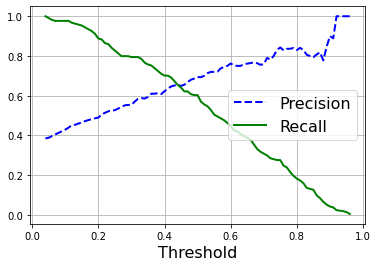

In [69]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

* 분류결정 임계값을 변경하면서 성능측정 ( ex).precisions > 80% 목표)

In [102]:
thresholds_80_precision = thresholds[np.argmax(precisions >= 0.8)] # 80퍼가 되야한다.
thresholds_80_precision

0.73

In [103]:
y_pred_80 = (y_scores[:,1] >= thresholds_80_precision)

In [104]:
precision_score(y_train, y_pred_80)

0.8

In [105]:
recall_score(y_train, y_pred_80)

0.2803738317757009

In [106]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores[:,1])

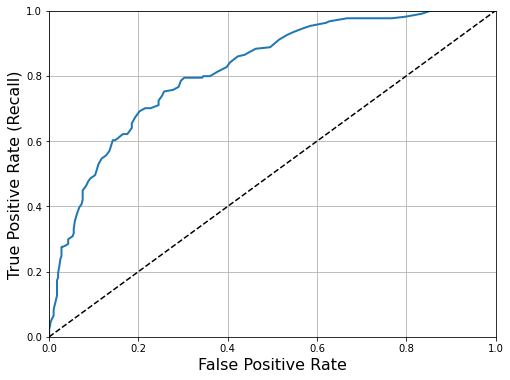

In [109]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.show() #FPR이 0인 부분일 수록 좋다. 완전 0.0보다 재현율도 꽤 높아져 있는 0.1언저리가 좋다.

* auc_score

In [112]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores[:,1])

0.8185806074766355

In [113]:
## 다중 분류

from sklearn.svm import SVC

svm_clf = SVC(gamma='auto', random_state=42)

svm_clf.fit(X_train[:1000], y_train[:1000])

y_train_